In [5]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Feature selection

In [6]:
df = pd.read_csv('features_balanced.csv')

In [7]:
X=df.drop(['target'], axis=1)
y = df['target']

In [8]:
estimator = RandomForestClassifier()

In [9]:
selector = RFECV(estimator, cv=5)
X_new = selector.fit_transform(X, y)

In [10]:
#performing preprocessing part
sc = StandardScaler()
X_new = sc.fit_transform(X_new)

In [11]:
pca = PCA(n_components = 5)
X_reduced = pca.fit_transform(X_new)

In [12]:
df_reduced = pd.DataFrame(X_reduced)
df_reduced['target'] = y
df_reduced.to_csv('reduced_data_R.csv', index=False)

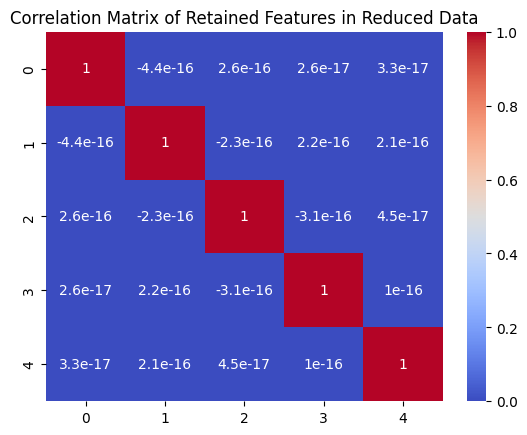

In [13]:
selected_features = X.columns[selector.support_]
corr_matrix = df_reduced.iloc[:, :-1].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Retained Features in Reduced Data')
plt.show()

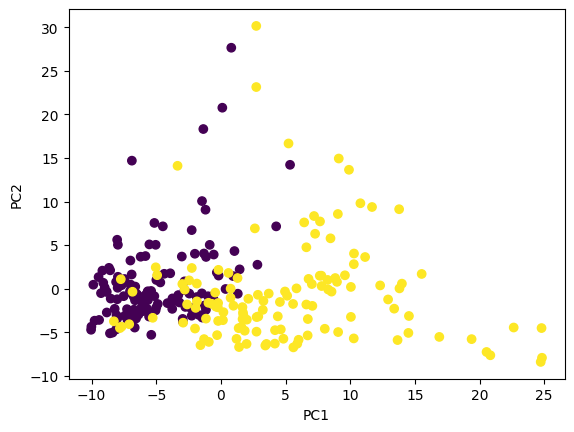

In [14]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()